# Q3-5.デジタル時計

## 問題
  **Q3-5.M5のディスプレイに時:分:秒を表示する時計を作りましょう。**

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# akari_clientをインポートする。
from akari_client import AkariClient
# 色を指定する際に使うColors,Colorのインポート
from akari_client.color import Colors
# 位置を指定する際に使うPositionsのインポート
from akari_client.position import Positions
# sleep関数を使うためにtimeのライブラリをインポートする。
import time
# 時刻取得に必要なライブラリをインポートする。
import datetime
import locale

# AkariClient、m5stackのインスタンスを取得する
akari = AkariClient()
m5 = akari.m5stack


def get_time() -> str:
    """
    現在時刻を返す独自関数
    引数:なし
    返り値: 時:分:秒の文字列
    """
    # 現在時刻を取得。
    locale.setlocale(locale.LC_TIME, 'ja_JP.UTF-8')
    dt_now = datetime.datetime.now()
    # 時:分:秒を返す。
    return (dt_now.strftime('%H:%M:%S'))


### ここから問題  ###

"""(コードを記述)"""

### ここまで  ###

### 動作イメージ

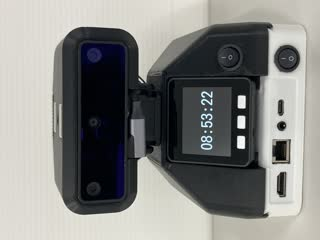

In [1]:
from IPython.display import Image
Image('image/q3-5.jpg')

### ヒント
[Q3-4](q3-4_pressure_sensor.ipynb)と同様、関数が実装されています。
まずはQ3-4を参考にすれば、1秒ごとに値を更新して表示する方法は分かるはずです。  

今回は時刻の文字列を返す _get_time()_ という関数があらかじめ実装されているので、これをQ3-4の _get_pressure()_ の代わりに使っていきます。  

時計の表示する文字の指定はありません。背景の色や文字の色、サイズや表示位置など色々試しながら、見栄えを調整してみましょう。  

完成したら実行してみましょう。  
M5のディスプレイに時:分:秒のデジタル時計が表示されていれば成功です。

## 回答と解説
以下は回答例と解説です。動作が正しければ、これと同じでなくても問題ありません。

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# akari_clientをインポートする。
from akari_client import AkariClient
# 色を指定する際に使うColors,Colorのインポート
from akari_client.color import Colors
# 位置を指定する際に使うPositionsのインポート
from akari_client.position import Positions
# sleep関数を使うためにtimeのライブラリをインポートする。
import time
# 時刻取得に必要なライブラリをインポートする。
import datetime
import locale

# AkariClient、m5stackのインスタンスを取得する
akari = AkariClient()
m5 = akari.m5stack


def get_time() -> str:
    """
    現在時刻を返す独自関数
    引数:なし
    返り値: 時:分:秒の文字列
    """
    # 現在時刻を取得。
    locale.setlocale(locale.LC_TIME, 'ja_JP.UTF-8')
    dt_now = datetime.datetime.now()
    # 時:分:秒を返す。
    return (dt_now.strftime('%H:%M:%S'))


### ここから問題  ###
m5.set_display_color(Colors.BLACK)
while(True):
    # 表示する時刻は、独自関数を呼び出して取得する。
    text = get_time()
    # 左右表示位置は真中揃え
    pos_x = Positions.CENTER
    # 上下表示位置は中央揃え
    pos_y = Positions.CENTER
    # 文字サイズは7にする
    size = 7
    # 文字色は白
    text_color = Colors.WHITE
    # 背景色は黒
    back_color = Colors.BLACK
    # 背景をリセットしない
    refresh = False
    # set_display_textを実行
    m5.set_display_text(
        text=text,
        pos_x=pos_x,
        pos_y=pos_y,
        size=size,
        text_color=text_color,
        back_color=back_color,
        refresh=refresh
        )
### ここまで  ###

#### 35行目:
```python
m5.set_display_color(Colors.BLACK)
```
今回はディスプレイの背景を黒に変更しています。

#### 36行目:
```python
while(True):
```
時刻を取得してディスプレイを更新する処理はwhile文でループします。

#### 38行目:
```python
text = get_time()
```
既に実装されている _get_time()_ を用いて、時刻の文字列を取得してtextに代入します。

#### 40行目:
```python
pos_x = Positions.CENTER
```
左右表示位置を真中揃えにします。Positions.CENTERで真中になります。

#### 42行目:
```python
pos_y = Positions.CENTER
```
上下表示位置を真中揃えにします。Positions.CENTERで真中になります。

#### 44行目:
```python
size = 7
```
今回は文字サイズを7にしています。

#### 46行目:
```python
text_color = Colors.WHITE
```
今回は文字色を白にしています。

#### 48行目:
```python
back_color = Colors.BLACK
```
今回は背景色を黒にしています。

#### 50行目:
```python
refresh = False
```
同じ場所に表示し続けるので、背景はリセットしなくても問題ないです。

#### 52行目:
```python
m5.set_display_text(
        text=text,
        pos_x=pos_x,
        pos_y=pos_y,
        size=size,
        text_color=text_color,
        back_color=back_color,
        refresh=refresh
        )
```
ここまで設定した変数を引数として、 _set_display_text()を実行します。

# Tips

#### 時刻の取得方法

**datetime型**  

21-31行目の _get_time()_ では、datetime型を使って時刻を取得しています。  

_datetime.datetime.now()_ で現在の日時が取得できます。  
下記のセルを実行すると使い方の例が見られます。

In [ ]:
import datetime

dt_now = datetime.datetime.now()
print(dt_now)

datetime型はそのまま日時の差を計算したり、日や時、分など特定の要素のみを抽出できたりなど非常に便利です。  
詳細は下記を参照してください。  
https://note.nkmk.me/python-datetime-timedelta-measure-time/

## 最後に
これでQ3-5は終了です。次は、チャレンジ問題に取り組んでみましょう。

[Q4-1へ](../4_challenge/q4-1_temperature_logger.ipynb)